# 04. Self Oil Station Price Analysis

[1. 셀레니움 설치](#install-selenium) <br>
[2. 셀프 주유소가 정말 저렴하나요? - 데이터 수집](#데이터-확보) <br>
&emsp;    - [페이지 접근](#페이지-접근)<br>
&emsp;    - [팝업창 닫기](#팝업창-닫기)<br>
&emsp;    - [지역: 시/도](#지역-시도)<br>
&emsp;    - [지역: 구](#지역-구)<br>
&emsp;    - [데이터 엑셀 저장](#엑셀-저장1)<br>
&emsp;    - [서울시 모든 구의 유가 정보 엑셀 저장](#엑셀-저장2)<br>
[3. 셀프 주유소가 정말 저렴하나요? - 데이터 정리](#데이터-정리) <br>
&emsp;    - [수집한 서울시 모든 구의 유가 정보 엑셀을 한 번에 가져오기](#엑셀-불러오기)<br>
&emsp;    - [데이터프레임에 저장 및 정리](#데이터프레임-저장)<br>
[4. 셀프 주유소가 정말 저렴하나요? - 주유 가격 정보 시각화](#시각화) <br>
&emsp;    - [boxplot(feat. pandas)](#pandas-boxplot)<br>
&emsp;    - [boxplot(feat.seaborn)](#seaborn-boxplot)<br>
&emsp;    - [지도 시각화](#지도-시각화)<br>

[Github에서는 toc가 작동안함. nbviewer로 보기👀](https://nbviewer.org/github/solpinetree/ds_study/blob/main/source_code/04.%20Self%20Oil%20Station%20Price%20Analysis.ipynb)

<a id="install-selenium"></a>
## 1. 셀레니움 설치
- 윈도우, mac(intel)
    - ```conda install conda-forge::selenium```
- mac(m-)
    - ```pip install selenium```

In [9]:
from selenium import webdriver
import selenium

In [12]:
driver = webdriver.Chrome()
driver.get("https://www.naver.com")

In [13]:
driver.quit()

---

<a id="데이터-확보"></a>
## 2. 셀프 주유소가 정말 저렴하나요? - 데이터 수집
- https://www.opinet.co.kr/searRgSelect.do
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

In [24]:
from selenium import webdriver

In [35]:
from selenium.webdriver.common.by import By

<a id="페이지-접근"></a>
### 페이지 접근

In [32]:
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome()
driver.get(url)

<a id="팝업창-닫기"></a>
### 팝업창 닫기

#### 현재 떠있는 창 확인
- `driver.window_handles` 리스트의 첫번째 값이 메인 윈도우 창

In [26]:
driver.window_handles

['77DAD6F8DE511189DE98D45E7A89E069']

In [33]:
def get_main():
    pages = driver.window_handles

    for i in pages:
        if i != pages[0]:
            driver.switch_to.window(i)
            driver.close()
    
    driver.switch_to.window(pages[0])

get_main()

<a id="지역-시도"></a>
### 지역: 시/도

In [38]:
sido_list_raw = driver.find_element(By.ID, 'SIDO_NM0')
sido_list_raw.text

'            시/도\n            \n             \n             \n              서울\n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n              경기\n             \n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [46]:
sido_list = sido_list_raw.find_elements(By.TAG_NAME, 'option')
len(sido_list), sido_list[0].text, sido_list[1].get_attribute("value")

(18, '시/도', '서울특별시')

In [47]:
sido_names = []

for option in sido_list:
    if option.text != '시/도':
        sido_names.append(option.get_attribute("value"))

sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [48]:
sido_list_raw.send_keys(sido_names[0])

<a id="지역-구"></a>
### 지역: 구

In [52]:
gu_list_raw = driver.find_element(By.ID, 'SIGUNGU_NM0')
gu_list_raw.text

'시/군/구\n강남구\n강동구\n강북구\n강서구\n관악구\n광진구\n구로구\n금천구\n노원구\n도봉구\n동대문구\n동작구\n마포구\n서대문구\n서초구\n성동구\n성북구\n송파구\n양천구\n영등포구\n용산구\n은평구\n종로구\n중구\n중랑구'

In [55]:
gu_list = gu_list_raw.find_elements(By.TAG_NAME, 'option')
gu_list[0].text, gu_list[1].text

('시/군/구', '강남구')

In [56]:
gu_names = []

for option in gu_list:
    if option.text != '시/군/구':
        gu_names.append(option.get_attribute('value'))

gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [57]:
gu_list_raw.send_keys(gu_names[4])

<a id="엑셀-저장1"></a>
### 데이터 엑셀 저장

In [58]:
excel_btn = driver.find_element(By.CSS_SELECTOR, '#templ_list0 > div:nth-child(7) > div > a')
excel_btn.click()

<a id="엑셀-저장2"></a>
### 서울시 모든 구의 유가 정보 엑셀 저장

In [59]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names, total = len(gu_names)):
    element = driver.find_element(By.ID, 'SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(3)

    element_get_excel = driver.find_element(By.CSS_SELECTOR, '#templ_list0 > div:nth-child(7) > div > a')
    element_get_excel.click()
    time.sleep(3)


/var/folders/fs/9jclkm_s0_7cvyj9prcm0z6r0000gn/T/ipykernel_1349/1265379090.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names, total = len(gu_names)):


  0%|          | 0/25 [00:00<?, ?it/s]

In [60]:
driver.close()

---

<a id="데이터-정리"></a>
## 3. 셀프 주유소가 정말 저렴하나요? - 데이터 정리

In [2]:
import pandas as pd
from glob import glob

<a id="엑셀-불러오기"></a>
### 수집한 서울시 모든 구의 유가 정보 엑셀을 한 번에 가져오기

In [3]:
glob("../data/seoul_oil_price/지역_*.xls")

['../data/seoul_oil_price/지역_위치별(주유소) (9).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (12).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (5).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (24).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (25).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (4).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (13).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (8).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (3).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (18).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (22).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (14).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (15).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (23).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (19).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (2).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (20).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (1).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (16).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (17).xls',
 '../data/seoul_oil_price/지

#### 파일명 저장

In [4]:
stations_files = glob("../data/seoul_oil_price/지역_*.xls")
stations_files[:5]

['../data/seoul_oil_price/지역_위치별(주유소) (9).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (12).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (5).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (24).xls',
 '../data/seoul_oil_price/지역_위치별(주유소) (25).xls']

#### 하나만 읽어보기

In [7]:
tmp = pd.read_excel(stations_files[0], header=2)
tmp.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),GS칼텍스,02-973-5172,Y,1995,1675,1525,-
1,서울특별시,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),S-OIL,02-976-5189,Y,1927,1675,1525,-
2,서울특별시,화랑대주유소,서울 노원구 화랑로 483,HD현대오일뱅크,02-977-9697,Y,2070,1675,1525,1600
3,서울특별시,(주)정건에너지직영,서울 노원구 노원로17길 29 (하계동),HD현대오일뱅크,02-975-1386,Y,1925,1675,1525,-
4,서울특별시,월계주유소,서울 노원구 월계로 252 (월계동),GS칼텍스,02-917-7650,Y,1914,1679,1535,-


#### 모두 읽기(pd.concat())

In [9]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

tmp_raw

[       지역              상호                       주소        상표          전화번호  \
 0   서울특별시  이엠석유(주)배꽃나라주유소    서울 노원구 화랑로 466 (공릉1동)     GS칼텍스   02-973-5172   
 1   서울특별시         태릉솔밭주유소      서울 노원구 노원로 49 (공릉동)     S-OIL   02-976-5189   
 2   서울특별시          화랑대주유소           서울 노원구 화랑로 483  HD현대오일뱅크   02-977-9697   
 3   서울특별시      (주)정건에너지직영   서울 노원구 노원로17길 29 (하계동)  HD현대오일뱅크   02-975-1386   
 4   서울특별시           월계주유소     서울 노원구 월계로 252 (월계동)     GS칼텍스   02-917-7650   
 5   서울특별시       구도일주유소 불암   서울 노원구 한글비석로 268 (중계동)     S-OIL   02-932-6850   
 6   서울특별시           삼육주유소     서울 노원구 화랑로 822 (공릉동)     SK에너지   02-949-3677   
 7   서울특별시           한신주유소    서울 노원구 동일로 1089 (공릉동)     S-OIL   02-974-5151   
 8   서울특별시  SK에너지㈜직영 상계주유소     서울 노원구 노해로 527 (상계동)     SK에너지   02-930-5151   
 9   서울특별시          성북역주유소      서울 노원구 광운로 95 (월계동)     GS칼텍스   02-919-8141   
 10  서울특별시           신성주유소     서울 노원구 월계로 328 (월계동)     S-OIL   02-916-4334   
 11  서울특별시          상계동주유소  서울 노원구 노원로26길 191 (상계동) 

In [11]:
# concat : 형식이 동일하고 연달아 붙이기만 하면 될 때는 concat

stations_raw = pd.concat(tmp_raw)
stations_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),GS칼텍스,02-973-5172,Y,1995,1675,1525,-
1,서울특별시,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),S-OIL,02-976-5189,Y,1927,1675,1525,-
2,서울특별시,화랑대주유소,서울 노원구 화랑로 483,HD현대오일뱅크,02-977-9697,Y,2070,1675,1525,1600
3,서울특별시,(주)정건에너지직영,서울 노원구 노원로17길 29 (하계동),HD현대오일뱅크,02-975-1386,Y,1925,1675,1525,-
4,서울특별시,월계주유소,서울 노원구 월계로 252 (월계동),GS칼텍스,02-917-7650,Y,1914,1679,1535,-
...,...,...,...,...,...,...,...,...,...,...
11,서울특별시,삼미상사(주)장안킹셀프주유소,서울 동대문구 한천로 100 (장안동),SK에너지,02-2242-7115,Y,-,1737,1597,-
12,서울특별시,홍능주유소,서울 동대문구 홍릉로 87 (청량리동),S-OIL,02-966-9190,N,-,1745,1597,1400
13,서울특별시,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),HD현대오일뱅크,02-2214-9890,N,-,1747,1598,1490
14,서울특별시,(주)안국에너지 삼원셀프주유소,서울 동대문구 망우로 90 (휘경동),SK에너지,02-2244-1972,Y,-,1748,1598,1460


In [12]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430 entries, 0 to 15
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      430 non-null    object
 1   상호      430 non-null    object
 2   주소      430 non-null    object
 3   상표      430 non-null    object
 4   전화번호    430 non-null    object
 5   셀프여부    430 non-null    object
 6   고급휘발유   430 non-null    object
 7   휘발유     430 non-null    object
 8   경유      430 non-null    object
 9   실내등유    430 non-null    object
dtypes: object(10)
memory usage: 37.0+ KB


In [13]:
stations_raw.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

<a id="데이터프레임-저장"></a>
### 데이터프레임에 저장 및 정리

In [15]:
stations = pd.DataFrame({
    "상호": stations_raw["상호"],
    "주소": stations_raw["주소"],
    "가격": stations_raw["휘발유"],
    "셀프": stations_raw["셀프여부"],
    "상표": stations_raw["상표"],
})

stations.tail()

,상호,주소,가격,셀프,상표
11,삼미상사(주)장안킹셀프주유소,서울 동대문구 한천로 100 (장안동),1737,Y,SK에너지
12,홍능주유소,서울 동대문구 홍릉로 87 (청량리동),1745,N,S-OIL
13,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),1747,N,HD현대오일뱅크
14,(주)안국에너지 삼원셀프주유소,서울 동대문구 망우로 90 (휘경동),1748,Y,SK에너지
15,오동나무주유소,서울 동대문구 한천로 81 (답십리동),1778,N,S-OIL


#### 구별 컬럼 추가

In [18]:
stations["주소"]

0      서울 노원구 화랑로 466 (공릉1동)
1        서울 노원구 노원로 49 (공릉동)
2             서울 노원구 화랑로 483
3     서울 노원구 노원로17길 29 (하계동)
4       서울 노원구 월계로 252 (월계동)
               ...          
11    서울 동대문구  한천로 100 (장안동)
12     서울 동대문구 홍릉로 87 (청량리동)
13      서울 동대문구 망우로 38 (휘경동)
14      서울 동대문구 망우로 90 (휘경동)
15    서울 동대문구  한천로 81 (답십리동)
Name: 주소, Length: 430, dtype: object

In [20]:
for address in stations["주소"]:
    print(address.split())

['서울', '노원구', '화랑로', '466', '(공릉1동)']
['서울', '노원구', '노원로', '49', '(공릉동)']
['서울', '노원구', '화랑로', '483']
['서울', '노원구', '노원로17길', '29', '(하계동)']
['서울', '노원구', '월계로', '252', '(월계동)']
['서울', '노원구', '한글비석로', '268', '(중계동)']
['서울', '노원구', '화랑로', '822', '(공릉동)']
['서울', '노원구', '동일로', '1089', '(공릉동)']
['서울', '노원구', '노해로', '527', '(상계동)']
['서울', '노원구', '광운로', '95', '(월계동)']
['서울', '노원구', '월계로', '328', '(월계동)']
['서울', '노원구', '노원로26길', '191', '(상계동)']
['서울', '노원구', '동일로', '1772']
['서울', '노원구', '공릉로', '294', '(하계동)']
['서울', '동작구', '시흥대로', '616', '(신대방동)']
['서울', '동작구', '사당로', '59', '(상도동)']
['서울', '동작구', '여의대방로', '214']
['서울', '동작구', '동작대로', '73', '(사당동)']
['서울', '동작구', '현충로', '101', '(흑석동)']
['서울', '동작구', '상도로', '403', '(상도동)']
['서울', '동작구', '동작대로', '135', '(사당동)']
['서울', '동작구', '상도로', '139', '(상도동)']
['서울', '동작구', '상도로', '334']
['서울', '관악구', '신림로', '290', '(신림동)']
['서울', '관악구', '보라매로', '41']
['서울', '관악구', '남부순환로', '1880', '(봉천동)']
['서울', '관악구', '과천대로', '921', '(남현동)']
['서울', '관악구', '남부순환로', '1920',

In [21]:
stations["구"] = [address.split()[1] for address in stations["주소"]]
stations.head()

,상호,주소,가격,셀프,상표,구
0,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),1675,Y,GS칼텍스,노원구
1,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),1675,Y,S-OIL,노원구
2,화랑대주유소,서울 노원구 화랑로 483,1675,Y,HD현대오일뱅크,노원구
3,(주)정건에너지직영,서울 노원구 노원로17길 29 (하계동),1675,Y,HD현대오일뱅크,노원구
4,월계주유소,서울 노원구 월계로 252 (월계동),1679,Y,GS칼텍스,노원구


In [23]:
stations["구"].unique(), len(stations["구"].unique()) 

(array(['노원구', '동작구', '관악구', '중구', '중랑구', '강서구', '마포구', '금천구', '강북구',
        '송파구', '은평구', '서대문구', '서초구', '종로구', '양천구', '강동구', '영등포구', '강남구',
        '성동구', '성북구', '용산구', '도봉구', '구로구', '광진구', '동대문구'], dtype=object),
 25)

#### 가격 데이터형 변환 object -> float

In [27]:
stations["가격"].unique() # '-' 값이 잇어 바로 astype 함수 사용 불가

array([1675, 1679, 1715, 1725, 1749, 1758, 1760, 1768, 1855, 1698, 1709,
       1724, 1729, 1734, 1739, 1779, 1875, 1718, 1742, 1743, 1825, 1898,
       2059, 1778, 1795, 1818, 1878, 1896, 2078, 2148, 2519, 2725, 1667,
       1699, 1713, 1717, 1651, 1653, 1684, 1688, 1695, 1696, 1697, 1727,
       1735, 1737, 1738, 1740, 1745, 1771, 1798, 1895, 1993, 1689, 1744,
       1764, 1774, 1788, 1799, 1681, 1682, 1683, 1702, 1753, 1775, 1665,
       1693, 1703, 1723, 1730, 1733, 1752, 1757, 1767, 1968, 1647, 1659,
       1669, 1677, 1678, 1726, 1728, 1685, 1707, 1736, 1747, 1756, 1759,
       1765, 1805, 1893, 2068, 2168, 1840, 1845, 1849, 1890, 2298, 2345,
       1691, 1704, 1719, 1789, 1864, 1766, 1780, 1785, 1796, 1820, 1958,
       2018, 1694, 1763, 1834, 2093, 2145, 2195, 2295, 1732, 1776, 1787,
       1860, 1887, 1899, 2040, 2178, 2228, 2283, 2286, 2288, 2395, 2498,
       2593, 1668, 1835, 1995, 2095, 2281, 1705, 1989, 1937, 1985, 2130,
       2149, 2164, 2169, 2170, 2287, 2299, 2829, 17

In [28]:
# 가격 정보 없는 주유소
stations[stations["가격"] == '-']

,상호,주소,가격,셀프,상표,구
11,HD현대오일뱅크㈜직영 중곡현대주유소,서울 광진구 동일로 435 (중곡동),-,Y,HD현대오일뱅크,광진구


In [30]:
# 가격 정보가 있는 주유소 데이터만 사용
stations = stations[stations["가격"] != '-']
stations["가격"] = stations["가격"].astype("float")
stations["가격"].unique, stations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429 entries, 0 to 15
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      429 non-null    object 
 1   주소      429 non-null    object 
 2   가격      429 non-null    float64
 3   셀프      429 non-null    object 
 4   상표      429 non-null    object 
 5   구       429 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.5+ KB


(<bound method Series.unique of 0     1675.0
 1     1675.0
 2     1675.0
 3     1675.0
 4     1679.0
        ...  
 11    1737.0
 12    1745.0
 13    1747.0
 14    1748.0
 15    1778.0
 Name: 가격, Length: 429, dtype: float64>,
 None)

In [31]:
stations

,상호,주소,가격,셀프,상표,구
0,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),1675.0,Y,GS칼텍스,노원구
1,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),1675.0,Y,S-OIL,노원구
2,화랑대주유소,서울 노원구 화랑로 483,1675.0,Y,HD현대오일뱅크,노원구
3,(주)정건에너지직영,서울 노원구 노원로17길 29 (하계동),1675.0,Y,HD현대오일뱅크,노원구
4,월계주유소,서울 노원구 월계로 252 (월계동),1679.0,Y,GS칼텍스,노원구
...,...,...,...,...,...,...
11,삼미상사(주)장안킹셀프주유소,서울 동대문구 한천로 100 (장안동),1737.0,Y,SK에너지,동대문구
12,홍능주유소,서울 동대문구 홍릉로 87 (청량리동),1745.0,N,S-OIL,동대문구
13,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),1747.0,N,HD현대오일뱅크,동대문구
14,(주)안국에너지 삼원셀프주유소,서울 동대문구 망우로 90 (휘경동),1748.0,Y,SK에너지,동대문구


#### 인덱스 재정렬

In [32]:
stations.reset_index(inplace=True)
stations.tail()

,index,상호,주소,가격,셀프,상표,구
424,11,삼미상사(주)장안킹셀프주유소,서울 동대문구 한천로 100 (장안동),1737.0,Y,SK에너지,동대문구
425,12,홍능주유소,서울 동대문구 홍릉로 87 (청량리동),1745.0,N,S-OIL,동대문구
426,13,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),1747.0,N,HD현대오일뱅크,동대문구
427,14,(주)안국에너지 삼원셀프주유소,서울 동대문구 망우로 90 (휘경동),1748.0,Y,SK에너지,동대문구
428,15,오동나무주유소,서울 동대문구 한천로 81 (답십리동),1778.0,N,S-OIL,동대문구


In [33]:
del stations["index"]
stations.head()

,상호,주소,가격,셀프,상표,구
0,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),1675.0,Y,GS칼텍스,노원구
1,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),1675.0,Y,S-OIL,노원구
2,화랑대주유소,서울 노원구 화랑로 483,1675.0,Y,HD현대오일뱅크,노원구
3,(주)정건에너지직영,서울 노원구 노원로17길 29 (하계동),1675.0,Y,HD현대오일뱅크,노원구
4,월계주유소,서울 노원구 월계로 252 (월계동),1679.0,Y,GS칼텍스,노원구


---

<a id="시각화"></a>
## 4. 셀프 주유소가 정말 저렴하나요? - 주유 가격 정보 시각화

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

f_path = "/Library/Fonts/Arial Unicode.ttf"
family = font_manager.FontProperties(fname=f_path).get_name()
rc("font", family=family)

<a id="pandas-boxplot"></a>
### boxplot(feat. pandas)

<Axes: title={'center': '가격'}, xlabel='셀프'>

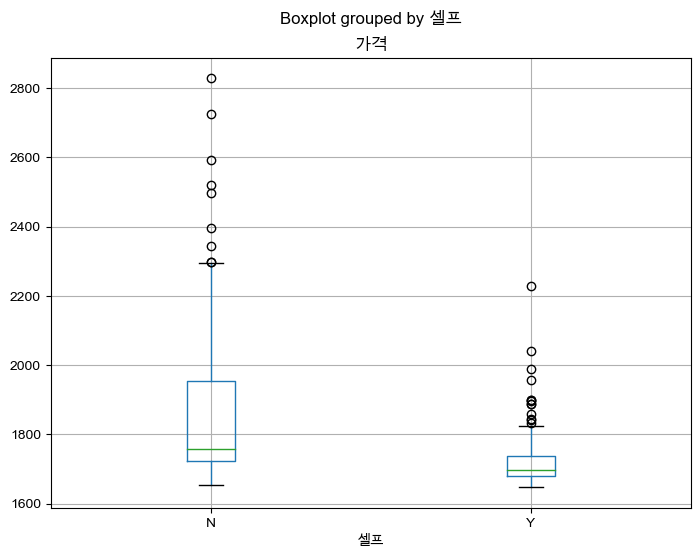

In [37]:
stations.boxplot(column="가격", by="셀프", figsize=(8, 6))

<a id="seaborn-boxplot"></a>
### boxplot(feat. seaborn)

#### 셀프 주유 여부에 따른 가격 분포

/var/folders/fs/9jclkm_s0_7cvyj9prcm0z6r0000gn/T/ipykernel_1705/1318752640.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="셀프", y="가격", data=stations, palette="Set3")


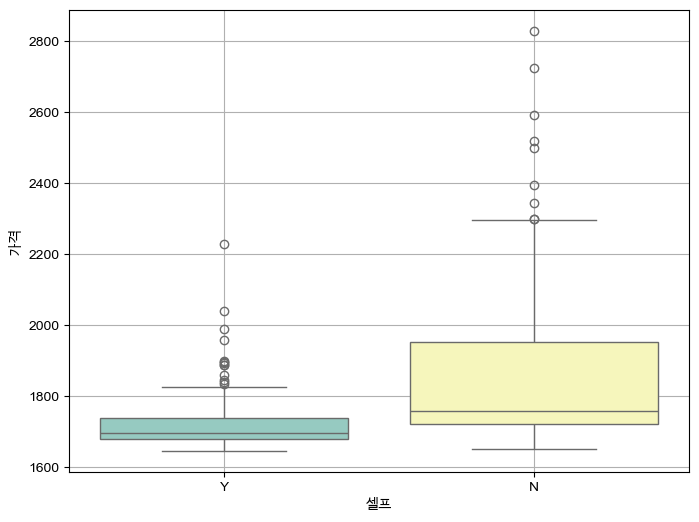

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="셀프", y="가격", data=stations, palette="Set3")
plt.grid(True)
plt.show()

#### 메이커 별 셀프 주유 여부에 따른 가격 분포

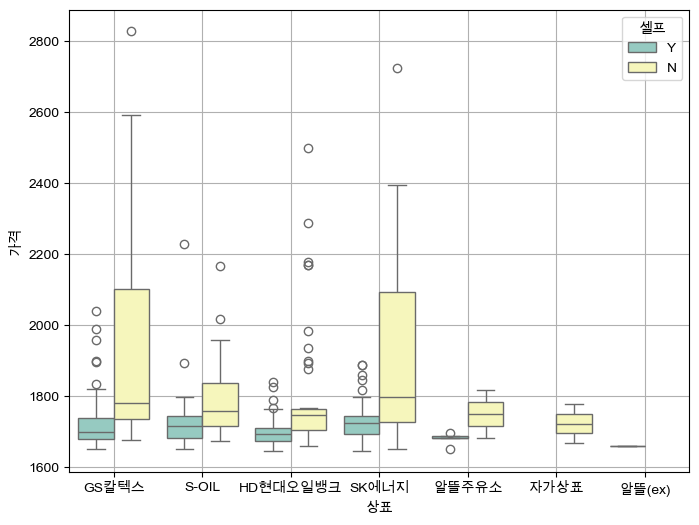

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.grid(True)
plt.show()

<a id="지도-시각화"></a>
### 지도 시각화

In [44]:
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

#### 가장 비싼 주유소 10개

In [45]:
stations.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
368,서계주유소,서울 용산구 청파로 367 (청파동),2829.0,N,GS칼텍스,용산구
46,서남주유소,서울 중구 통일로 30,2725.0,N,SK에너지,중구
317,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2593.0,N,GS칼텍스,강남구
45,필동주유소,서울 중구 퇴계로 196 (필동2가),2519.0,N,GS칼텍스,중구
316,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2498.0,N,HD현대오일뱅크,강남구
315,SK논현주유소,서울 강남구 논현로 747 (논현동),2395.0,N,SK에너지,강남구
223,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2345.0,N,GS칼텍스,종로구
367,한석주유소,서울 용산구 이촌로 164,2299.0,N,SK에너지,용산구
222,SK북악주유소,서울 종로구 평창문화로 137,2298.0,N,SK에너지,종로구
287,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2295.0,N,GS칼텍스,영등포구


#### 가장 저렴한 주유소 10개

In [46]:
stations.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
403,(주)자연에너지 중원주유소,서울 광진구 동일로 398 (중곡동),1647.0,Y,HD현대오일뱅크,광진구
402,서울중앙고속주유소,서울 광진구 동일로 345 (중곡동),1647.0,Y,SK에너지,광진구
155,(주)아이에스피에너지(서울서부고속주유소),서울 은평구 응암로 163,1647.0,Y,HD현대오일뱅크,은평구
60,화곡역주유소,서울 강서구 강서로 154 (화곡동),1651.0,Y,알뜰주유소,강서구
61,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1653.0,Y,HD현대오일뱅크,강서구
224,현대주유소,서울 양천구 남부순환로 372 (신월동),1653.0,Y,S-OIL,양천구
225,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1653.0,N,SK에너지,양천구
226,플라트(주)서호주유소,서울 양천구 남부순환로 317,1653.0,Y,GS칼텍스,양천구
227,HD현대오일뱅크㈜직영 남부순환셀프주유소,서울 양천구 남부순환로 553 (신월동),1653.0,Y,HD현대오일뱅크,양천구
228,신월주유소,서울 양천구 신월로 193 (신월동),1653.0,Y,GS칼텍스,양천구


#### 구별 주유 가격 평균값 지도 시각화

In [63]:
import numpy as np

gu_data = pd.pivot_table(
    data=stations, 
    index="구", 
    values="가격", 
    aggfunc=np.mean
)
gu_data.sort_values("가격", ascending=False).head()

,가격
구,
용산구,2214.666667
중구,2037.400000
강남구,1952.000000
종로구,1936.875000
강동구,1811.307692


In [60]:
from folium.features import DivIcon

# 출처 : https://github.com/cubensys/Korea_District
seoul_gu_center = pd.read_csv("../data/서울시_자치구_중심점_2017.csv", encoding="euc-kr")
seoul_gu_center.head()

seoul_gu_center.rename(columns={'X':'lng', 'Y':'lat'}, inplace=True)

In [61]:
def display_gu(map):
    for idx, row in seoul_gu_center.iterrows():
        folium.Marker(
            location = [row["lat"], row["lng"]],
            icon=DivIcon(
                icon_size=(90,50),
                icon_anchor=(25, 25),
                html=f'''
                    <div style="font-size:10px;font-weight:bold;color:white;background:blue;padding:1px;border-radius:5px;text-align:center;">
                    {row["시군구명"]}
                    </div>
                '''
            )
        ).add_to(map)

In [64]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5)
folium.Choropleth(
    geo_data = geo_str,
    data=gu_data,
    columns=[gu_data.index, "가격"],
    key_on="feature.id",
    fill_color="PuRd"
).add_to(my_map)

display_gu(my_map)

my_map